## Recommendation systems (Netflix Prize)

Goal is to accurately predict a user's preferred movies based on user-submitted ratings on how much they enjoyed other movies (note that not all movies are rated by the user)

Peformance is measured based on root-mean-square error (RMSE).
- baseline random model based on averages of all user ratings had an RMSE of 1.0540 on the quiz set
- Netflix's Cinematch had an RMSE of 0.9525 on the quiz set

To win the $1 million prize, the winning team will have to achieve 0.8572 RMSE on the quiz set or lower. The most successful teams made use of ensemble methods to achieve their targets, including techniques such as collaborative filtering, matrix factorisation regression models, LASSO.

In today's class, we will look at clustering approaches.

### Clustering (K-means)

There might not be a huge database of ratings associated with a new movie rating service. So, in order to "initialise" the service, it might forgo user ratings initially and use the attributes associated with the given movie (item) to find the clusters.

Given $n$ observations partition it into $k$ clusters $c_1, ... , c_k$ so as to minimise the cluster sum of squares (linear partition of space into Voronoi cells):
$$ \large min_{c_i,\:\mu_i} \sum_{k=1}^{K} \sum_{i\in C_k}^{} ||\:\bar{x}_i - \bar{\mu}_k\:||^{\:2}$$

To get the locally optimal partitioning, Lloyd's algorithm is used:

### Clustering (Hierarchial)

This method does not require $K$ to be prescriptive and provides a tree-boxed representation of the observations (called a dendogram). In order to decide which clusters should be combined (for agglomerative), or where a cluster should be split (for divisive; *not covered here*), a measure of dissimilarity between sets of observations is required. In most methods of hierarchical clustering, this is achieved by: **a)** the use of an appropriate objective metric (**e.g., minimising the Euclidean distance between pairs of observations**), **b)** a linkage criterion which specifies the dissimilarity of sets as a function of the pairwise distances of observations between sets.

Possible linkage criteria include:
- The sum of all intra-cluster variance
- The decrease in variance for the cluster being merged (Ward's criterion)
- The probability that candidate clusters spawn from the same distribution function (V-linkage)
- The product of in-degree and out-degree on a k-nearest-neighbour graph (graph degree linkage)
- The increment of some cluster descriptor (i.e., a quantity defined for measuring the quality of a cluster) after merging two clusters

### Preprocessing on `MovieLens` dataset

In [1]:
movies <- read.csv("csv/movies.csv", stringsAsFactors = F)
str(movies)

# for each row in `movies`, we can count how many genres are associated with each movie
countFields <- count.fields("csv/genres.csv", sep="|")
countFields[1] # gets how many genres the first movie has
max(countFields) # max number of genres a movie can have

# genres
g <- read.csv("csv/genres.csv", header=F, sep="|", col.names=c("x1", "x2", "x3", "x4", "x5", "x6", "x7"))
str(g)
head(g)

# from str(g)`, since each variable has different number of factor levels, we will need to standardise things here
fac <- union(union(union(union(union(union(
    levels(g$x1), levels(g$x2)), levels(g$x3)), levels(g$x4)), levels(g$x5)), levels(g$x6)), levels(g$x7))

# fac has a total of 20 categories from Action to IMAX where "" simply indicates missing categories
fac

# to standardise across all variables (because some vars did not have the same number of factor levels)
g$x1 <- factor(g$x1, fac)
g$x2 <- factor(g$x2, fac)
g$x3 <- factor(g$x3, fac)
g$x4 <- factor(g$x4, fac)
g$x5 <- factor(g$x5, fac)
g$x6 <- factor(g$x6, fac)
g$x7 <- factor(g$x7, fac)
str(g)
# head(g)

# creating a matrix denoting if a movie is associated with that genre
M <- matrix(0, nrow=NROW(movies), ncol=length(levels(g$x1)))
colnames(M) <- fac

# inputting attribute (genre) association data for each movie
for (i in 1:NROW(movies)) {
    M[i, g[i,"x1"]] <- 1
    M[i, g[i,"x2"]] <- 1
    M[i, g[i,"x3"]] <- 1
    M[i, g[i,"x4"]] <- 1
    M[i, g[i,"x5"]] <- 1
    M[i, g[i,"x6"]] <- 1
    M[i, g[i,"x7"]] <- 1
}

# converting to dataframe, add movie title, drop the column with empty header string ""
data <- as.data.frame(M)
data$title <- movies$title
data <- data[, -19]
head(data)

'data.frame':	8569 obs. of  2 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...


[1] 5

[1] 7

'data.frame':	8569 obs. of  7 variables:
 $ x1: Factor w/ 18 levels "Action","Adventure",..: 2 2 5 5 5 1 5 2 1 1 ...
 $ x2: Factor w/ 19 levels "","Adventure",..: 3 4 15 8 1 6 15 4 1 2 ...
 $ x3: Factor w/ 18 levels "","Animation",..: 3 8 1 14 1 16 1 1 1 16 ...
 $ x4: Factor w/ 16 levels "","Children",..: 3 1 1 1 1 1 1 1 1 1 ...
 $ x5: Factor w/ 14 levels "","Comedy","Crime",..: 5 1 1 1 1 1 1 1 1 1 ...
 $ x6: Factor w/ 10 levels "","Fantasy","IMAX",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ x7: Factor w/ 6 levels "","IMAX","Mystery",..: 1 1 1 1 1 1 1 1 1 1 ...


x1,x2,x3,x4,x5,x6,x7
Adventure,Animation,Children,Comedy,Fantasy,,
Adventure,Children,Fantasy,,,,
Comedy,Romance,,,,,
Comedy,Drama,Romance,,,,
Comedy,,,,,,
Action,Crime,Thriller,,,,


[1] "Action"      "Adventure"   "Animation"   "Children"    "Comedy"     
 [6] "Crime"       "Documentary" "Drama"       "Fantasy"     "Film-Noir"  
[11] "Horror"      "Musical"     "Mystery"     "Romance"     "Sci-Fi"     
[16] "Thriller"    "War"         "Western"     ""            "IMAX"

'data.frame':	8569 obs. of  7 variables:
 $ x1: Factor w/ 20 levels "Action","Adventure",..: 2 2 5 5 5 1 5 2 1 1 ...
 $ x2: Factor w/ 20 levels "Action","Adventure",..: 3 4 14 8 19 6 14 4 19 2 ...
 $ x3: Factor w/ 20 levels "Action","Adventure",..: 4 9 19 14 19 16 19 19 19 16 ...
 $ x4: Factor w/ 20 levels "Action","Adventure",..: 5 19 19 19 19 19 19 19 19 19 ...
 $ x5: Factor w/ 20 levels "Action","Adventure",..: 9 19 19 19 19 19 19 19 19 19 ...
 $ x6: Factor w/ 20 levels "Action","Adventure",..: 19 19 19 19 19 19 19 19 19 19 ...
 $ x7: Factor w/ 20 levels "Action","Adventure",..: 19 19 19 19 19 19 19 19 19 19 ...


Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,IMAX,title
0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Toy Story (1995)
0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Jumanji (1995)
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Grumpier Old Men (1995)
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,Waiting to Exhale (1995)
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Father of the Bride Part II (1995)
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,Heat (1995)


### Hierarchial clustering in R

In [2]:
# computes distances between movies using the first 19 columns
distances <- dist(data[,1:19], method="euclidean")

# performs hierach cluster analysis using the distances calculated
cluster <- hclust(distances, method="ward.D2")
options(repr.plot.width=9, repr.plot.height=7) # resize IRkernel plot size
plot(cluster)

ERROR: Error in data[, 1:19]: object of type 'closure' is not subsettable


In [1]:
# cuts tree into 10 subclusters
clusterGroups <- cutree(cluster, k=10)
# how do we select k-value???

# computes average value  across the cluster groups for the 'Action' genre
# higher value indicates many movies in the cluster are action movies
tapply(data[,1], clusterGroups, mean)

# Now, compute average value  across the cluster groups for ALL genres
# higher value indicates many movies in the cluster are of that genre
categories <- matrix(0, nrow=19, ncol=10)
for (i in 1:19) {
    categories[i,] <- tapply(data[,i], clusterGroups, mean)
}

# naming the matrix rows and columns
rownames(categories) <- colnames(data)[1:19]
colnames(categories) <- c("Cluster 1", "Cluster 2", "Cluster 3",
                          "Cluster 4", "Cluster 5", "Cluster 6",
                          "Cluster 7", "Cluster 8", "Cluster 9",
                          "Cluster 10")
categories

ERROR: Error in nrow(tree$merge): object 'cluster' not found


In [4]:
# lets us see which movies are in the 6th cluster grouping
# subset(data$title, clusterGroups == 6)

# select row number corresponding to movie 'Grand Budapest Hotel' in dataframe
subset(data, movies$title == "Grand Budapest Hotel, The (2014)")
clusterGroups[8418] # in cluster 3

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,IMAX,title
8418,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"Grand Budapest Hotel, The (2014)"


[1] 3

### K-means clustering in R

In [5]:
set.seed(1)

# `nstart=20` does 20 random initialisations and selects the set that has the best kmeans result out of 20
cluster2 <- kmeans(data[,1:19], centers=10, nstart=20)
cluster3 <- kmeans(data[,1:19], centers=10, nstart=1)

# extract SSE values
cluster2$tot.withins # k-means SSE is lower
cluster3$tot.withins # k-means SSE is higher

# Now, compute average value across the cluster groups for ALL genres
# higher value indicates many movies in the cluster are of that genre
categories2 <- matrix(0, nrow=19, ncol=10)
for (i in 1:19) {
    categories2[i,] <- tapply(data[,i], cluster2$cluster, mean)
}
rownames(categories2) <- colnames(data)[1:19]
colnames(categories2) <- c("Cluster 1", "Cluster 2", "Cluster 3",
                          "Cluster 4", "Cluster 5", "Cluster 6",
                          "Cluster 7", "Cluster 8", "Cluster 9",
                          "Cluster 10")
categories2

[1] 7324.78

[1] 7875.288

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10
Action,0.084130019,0.442598187,0.033542039,0.000000000,0.970370370,0.0825515947,0.084019769,0.093821510,0.343085106,0.015483871
Adventure,0.013384321,0.046827795,0.048300537,0.071691176,0.544444444,0.0437773609,0.013179572,0.679633867,0.146276596,0.018064516
Animation,0.005736138,0.006042296,0.006708408,0.025735294,0.040740741,0.0131332083,0.009884679,0.542334096,0.007978723,0.006451613
Children,0.000000000,0.001510574,0.015652952,0.001838235,0.013580247,0.0537836148,0.001647446,0.816933638,0.000000000,0.018064516
Comedy,0.198852772,0.117824773,0.000000000,0.000000000,0.116049383,1.0000000000,0.064250412,0.478260870,0.039893617,1.000000000
Crime,0.022944551,0.998489426,0.080053667,0.005514706,0.016049383,0.0838023765,0.042833608,0.016018307,0.010638298,0.060645161
Documentary,0.015296367,0.000000000,0.006261181,0.590073529,0.001234568,0.0218886804,0.000000000,0.000000000,0.002659574,0.002580645
Drama,0.093690249,0.581570997,1.000000000,0.000000000,0.180246914,0.0000000000,0.174629325,0.086956522,0.864361702,1.000000000
Fantasy,0.059273423,0.009063444,0.041144902,0.016544118,0.124691358,0.0393996248,0.075782537,0.480549199,0.005319149,0.036129032
Film-Noir,0.000000000,0.055891239,0.015205725,0.012867647,0.002469136,0.0006253909,0.013179572,0.000000000,0.000000000,0.002580645


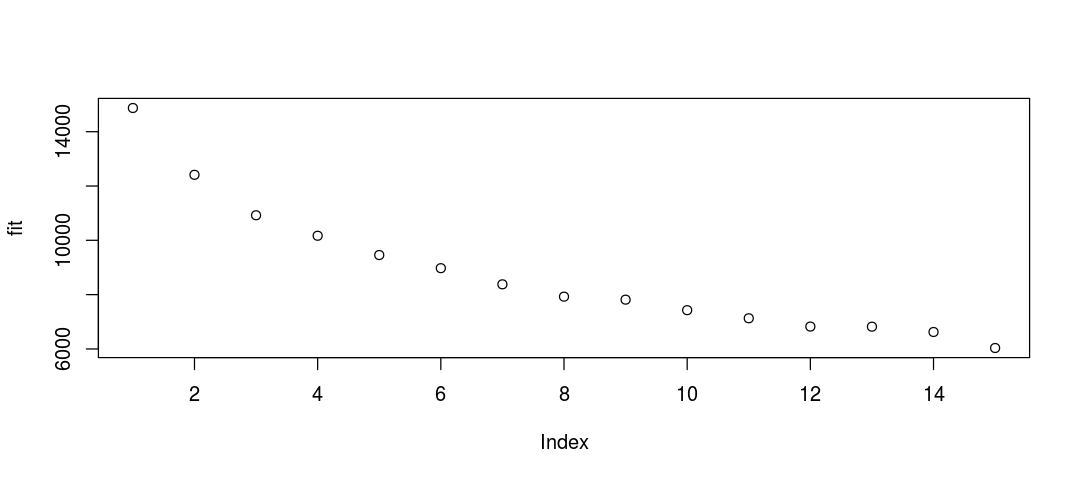

In [6]:
set.seed(1)

# as the number of clusters increases, the lower the SSE of the k-means algo
fit <- 0 #initialise empty var
for (k in 1:15) {
    cluster4 <- kmeans(data[,1:19], centers=k, nstart=20)
    fit[k] <- cluster4$tot.withins
}
options(repr.plot.width=9, repr.plot.height=4) # resize IRkernel plot size
plot(fit)

## Recommendation Systems

There are two main types of recommendation systems
- **collaborative filtering** (look at user historical preferences to suggest choices)
- **content filtering** (look at item attributes to suggest choices)
- **hybrid filtering** (combination of first two systems)

### Collaborative filtering

Create top-*N* recommendation list for a user depending on what other movies other users who like the movie you like, also like. Note that collaborative filtering will suffer from *cold start* problem.

A simple baseline model is to predict the average rating based on item popularity average:

$$\large b_{u,i} = \bar{r}_i$$

#### User-based collaborative model

Based on identifying other users whose ratings are similar to that of the active users. Using cosine similarity, we have:

$$\large s(u,v) = \frac{\sum\limits_{i\in I_u \cap I_v}^{} r_{ui}r_{vi}}{\sqrt{\sum\limits_{i\in I_u \cap I_v} r_{ui}^2}\sqrt{\sum\limits_{i\in I_u \cap I_v} r_{vi}^2 }}$$

#### Item-based collaborative model

Based on identifying items for users that are similar to the items they like. The idea is that is if two items have similar rating patterns across users, the items are similar. Users will prefer items that are similar where the similarity metric is measured as such:

$$\large s(i,j) = \frac{\sum\limits_{u\in U_i \cap U_j}^{} r_{ui}r_{uj}}{\sqrt{\sum\limits_{u\in U_i \cap U_j} r_{ui}^2}\sqrt{\sum\limits_{u\in U_i \cap U_j} r_{uj}^2 }}$$

### Using the `MovieLens` dataset

In [7]:
ratings <- read.csv("csv/ratings.csv")
str(ratings)

max(table(ratings$userId)) # max number of movies rated by a single person
min(table(ratings$userId)) # min number of movies rated by a single person

max(table(ratings$movieId)) # max number of users who have rated a single movie
min(table(ratings$movieId)) # min number of users who have rated a single movie

which(table(ratings$movieId)==337)

'data.frame':	100023 obs. of  3 variables:
 $ userId : int  1 1 1 1 1 1 1 1 1 1 ...
 $ movieId: int  6 22 32 50 110 164 198 260 296 303 ...
 $ rating : num  2 3 2 5 4 3 3 5 4 3 ...


[1] 2268

[1] 20

[1] 337

[1] 1

593 
537

,6,22,32,50,110,164,198,260,296,303,⋯,7213,7252,7274,7275,4828,92481,93855,98956,3782,60189
1,2,3,2,5.0,4,3,3,5,4,3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,NA,NA,3,4.0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,5,NA,NA,5,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,4.5,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


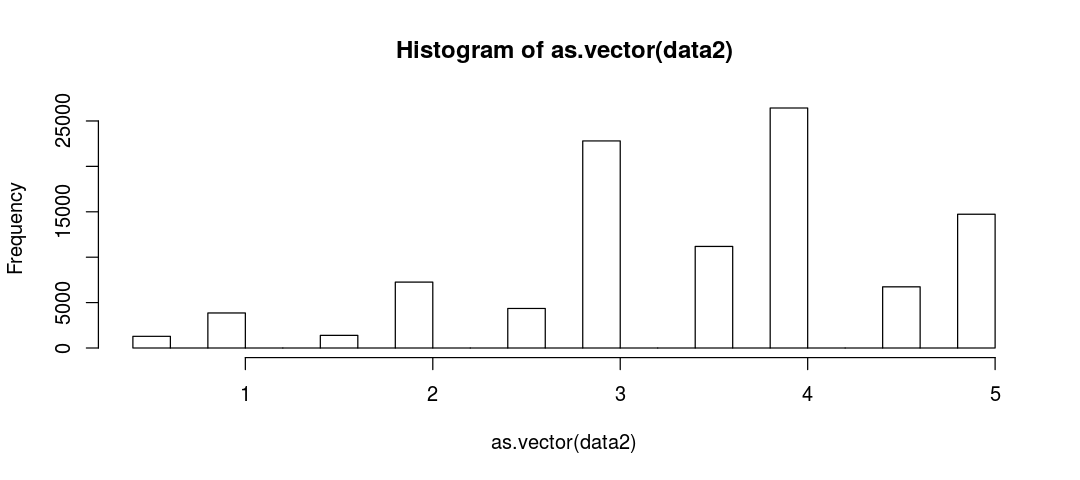

In [8]:
# create preference matrix to denote which users have rated what movies
data2 <- matrix(nrow=length(unique(ratings$userId)), ncol=length(unique(ratings$movieId)))
rownames(data2) <- unique(ratings$userId)
colnames(data2) <- unique(ratings$movieId)

for (i in 1:NROW(ratings)) {
    data2[as.character(ratings$userId[i]), as.character(ratings$movieId[i])] <- ratings$rating[i]
}
head(data2)

# plot histogram of user ratings
hist(as.vector(data2))

We can observe how there are more movies rated a 3 or 4 than movies rated 1 or 2. Hence, we will need to normalise to reduce the inherent bias in the proportion of movvies rated 3 or 4.

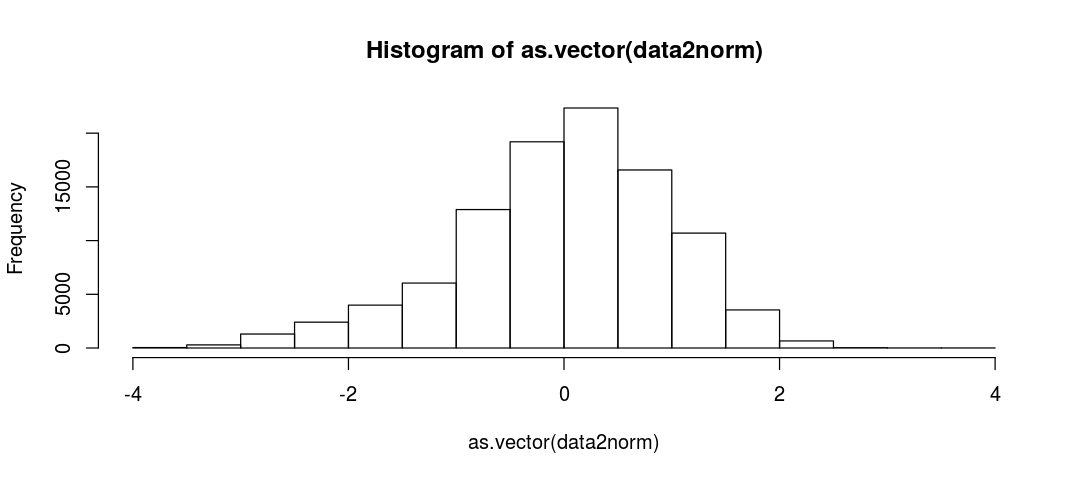

In [9]:
data2norm <- data2 - rowMeans(data2, na.rm=T)
hist(as.vector(data2norm))

Now, setting up our training and test sets

In [10]:
set.seed(1)
# here we are sampling without using `caTools` library

# partitioning rows (users)
splR <- sample(1:nrow(data2), 0.98*nrow(data2))
splRC <- setdiff(1:nrow(data2), splR)

# partitioning cols (movies)
set.seed(2)
splC <- sample(1:ncol(data2), 0.8*ncol(data2))
splCC <- setdiff(1:ncol(data2), splC)

Create three different prediction approaches and corresponding predicted rating matrices.

In [11]:
# create three different prediction approaches
# and corresponding predicted rating matrices
UserPred <- matrix(nrow=length(splRC), ncol=length(splCC)) # smallest partioning matrix (lower-right)
Base1 <- matrix(nrow=length(splRC), ncol=length(splCC))
Base2 <- matrix(nrow=length(splRC), ncol=length(splCC))

This computes predicted ratings for the baseline models by averaging out the item rating for all the users in the training set $(splR)$.

In [17]:
## BASELINE MODEL
for (i in 1:length(splRC)) {
    # fixing users (goal is to find ratings for user i)
    Base1[i,] <- colMeans(data2[splR, splCC], na.rm=T)
}
for (j in 1:length(splCC)) {
    # fixing movies (goal is to find ratings for movie j)
    Base2[,j] <- rowMeans(data2[splRC, splC], na.rm=T)
}

This creates an `Order` matrix of dimension $15*691$ where each row corresponds to neighbours of the users in the $splRC$ in decreasing order of the correlation coefficient.

The `NA`s increasing that there are some users who have no common ratings of movies with the users.

In [24]:
## USER-BASED COLLAB FILTERING
Cor <- matrix(nrow=length(splR), ncol=1)
# `Cor` is a temp var for storing correlation for each user in the RC test-set in the loop below
Order <- matrix(nrow=length(splRC), ncol=length(splR))

options(warn=-1) # suppress warnings
for (i in 1:length(splRC)) {
    for (j in 1:length(splR)) {
        # compute correlation between user i and j
        Cor[j] <- cor(data2[splRC[i], splC],
                      data2[splR[j], splC],
                      use = "pairwise.complete.obs")
    
    }
    # `order()` returns the indices of the vector in sorted order
    # thus, we want the index with the highest correlation up top first
    v <- order(Cor, decreasing = T, na.last = NA)
    Order[i,] <- c(v, rep(NA, times = length(splR) - length(v)))
}
options(warn=0) # enable warnings

In [26]:
# look at the ordering of the user ID's with the largest correlation with user #1, in decreasing order
Order[1,1:15]
# 11 69 108 155 164 348 374 379 381 444 454 464 513 519 576

dim(Order) # should be 15 x 691

[1]  11  69 108 155 164 348 374 379 381 444 454 464 513 519 576

[1]  15 691

In [14]:
# computes prediction of 250 nearest neightbours and averaging equally over all these user ratings in the movies
# in `splCC`
for(i in 1:length(splRC)) {
    UserPred[i,] <- colMeans(data2[splR[Order[i, 1:250]], splCC], na.rm=T)
}

# compute error rate for `UserPred`
RMSEUserPred <- sqrt(mean((data2[splRC, splCC]-UserPred)^2, na.rm = T))
RMSEUserPred

# compute error rate for `Base1`
RMSEBase1 <- sqrt(mean((data2[splRC, splCC]-Base1)^2, na.rm = T))
RMSEBase1

# compute error rate for `Base2`
RMSEBase2 <- sqrt(mean((data2[splRC, splCC]-Base2)^2, na.rm = T))
RMSEBase2

[1] 0.8985567

[1] 0.9310296

[1] 0.9953377